In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import struct
import bz2
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import data, img_as_float
import glob

## Measure the diffraction point drift during 4D STEM scan
After the gun change early 2020, the pivot point seems to be off a lot which means the diffraction beam will move around during scan, so we need to make sure that when performing 4D STEM under high magnification, the pivot point problem won't be a big trouble.
<br>Check the scan pivot point by doing 4D STEM at different magnification with no sample, and directly measure how the zero beam move during the scan by calculate COM.

In [35]:
# Folder with 4D STEM data collected with no sample under different magnification
path = '/srv/home/chenyu/DEbackup/030620/PivotPoint/'
folder_list = glob.glob(path + 'S*')

In [53]:
# For each magnification, calculate the COM drift
num_cols = 50
num_rows = 50
mag_list = np.zeros((len(folder_list),1))
drift_list = np.zeros((len(folder_list),2))

for ifolder in range(len(folder_list)):

    path = folder_list[ifolder]
    mag_list[ifolder] = float(path.split('/')[-1].split('_')[-1][0:-2])
    print(path, mag_list[ifolder])
    name = path.split('/')[-1].split('_')[0]

    sample = np.load(path + '/npy/' + name + '_' + format(1,'05')+'.npy')
    kx,ky = sample.shape[0:2]
    kx = np.linspace(0,kx-1,kx)
    ky = np.linspace(0,ky-1,ky)
    weights_x, weights_y = np.meshgrid(kx,ky)

    COM = np.zeros((num_rows,num_cols,2))

    for irow in range(num_rows):
        for icol in range(num_cols):
            nSample = irow*num_cols+icol+1
            sample = np.load(path + '/npy/' + name + '_' + format(nSample,'05')+'.npy')
            COM[irow,icol,0] = np.average(weights_x,weights = sample)
            COM[irow,icol,1] = np.average(weights_y,weights = sample)

            if irow % 10 == 0 and icol == 0:
                print("Finished row %d " % (irow))
                
    drift_list[ifolder,0] = np.amax(COM[1:-1,:,0]) - np.amin(COM[1:-1,:,0]) # max drift along x scan
    drift_list[ifolder,1] = np.amax(COM[1:-1,:,1]) - np.amin(COM[1:-1,:,1]) # max drift along y scan

/srv/home/chenyu/DEbackup/030620/PivotPoint/S8_20.5MX [20.5]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S6_10MX [10.]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S3_2.55MX [2.55]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S9_29MX [29.]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S4_3.6MX [3.6]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S2_1.8MX [1.8]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row 40 
/srv/home/chenyu/DEbackup/030620/PivotPoint/S7_14.5MX [14.5]
Finished row 0 
Finished row 10 
Finished row 20 
Finished row 30 
Finished row

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 7 Text yticklabel objects>)

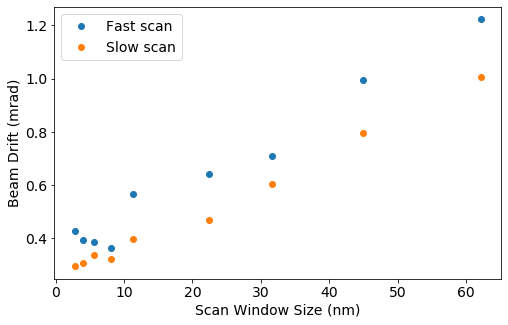

In [88]:
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.plot(80.77/mag_list, drift_list[:,0]*0.15,'o',label='Fast scan')
ax1.plot(80.77/mag_list, drift_list[:,1]*0.15,'o',label = 'Slow scan')
ax1.set_xlabel('Scan Window Size (nm)',fontsize=14)
ax1.set_ylabel('Beam Drift (mrad)', fontsize = 14)
ax1.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# ax2 = ax1.twiny()
# ax2.set_xticklabels(mag_list)